<a href="https://colab.research.google.com/github/mansi05-t/Decodr/blob/master/Air_Quality_India.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Air Quality Data EDA and Trends


Air is what keeps humans alive. Monitoring it and understanding its quality is of immense importance to our well-being. The dataset contains air quality data and AQI (Air Quality Index) at hourly and daily level of various stations across multiple cities in India.

![picture](https://drive.google.com/uc?id=1JOhc8XdQxJBGsKnbziiM6Xw7rX7ZHpgw)


In [ ]:
# Importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from pandas_profiling import ProfileReport
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import files
files = files.upload()

Saving city_day.csv to city_day (1).csv


In [ ]:
df = pd.read_csv('city_day.csv')
df["Year"] = pd.to_datetime(df.Date).dt.year

The following table shows how our data looks like:

In [ ]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,Year
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN,2015
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN,2015
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN,2015
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN,2015
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN,2015


# Eight pollutant have been taken into account to calculate AQI

* Nitrogen oxide (NOx)

* Sulpher dioxide(S02)

* PM2.5 

* PM 10

* Ozone (O3)

* Carbon monoxide (CO)

* Ammonia (NH3)

* Nitrogen dioxide(NO2)


**PM2.5**

PM2. 5 refers to atmospheric particulate matter (PM) that have a diameter of less than 2.5 micrometers, which is about 3% the diameter of a human hair

PM2.5 are tiny particles in the air that reduce visibility and cause the air to appear hazy when levels are elevated.

**PM 10**

PM10 are very small particles found in dust and smoke. They have a diameter of 10 micrometres (0.01 mm) or smaller. PM10 particles are a common air pollutant.

In [ ]:
print(f"The available data is between {df['Date'].min()} and {df['Date'].max()}")

The available data is between 2015-01-01 and 2020-04-10


In [ ]:
# finding the missing values

missing_ratio = np.round(df.isna().sum()/len(df)*100,2)
missing_ratio = pd.DataFrame(missing_ratio , columns=['Missing_Ratio'])
missing_ratio.sort_values('Missing_Ratio',ascending=False)

,Missing_Ratio
Xylene,64.24
PM10,41.88
NH3,38.29
Toluene,28.99
Benzene,20.04
NO,17.64
PM2.5,16.65
AQI,16.63
AQI_Bucket,16.63
NOx,15.73


Since 'Xylene'and 'PM10' has the highest missing ratio, I will drop them as they are not going to pour much light on my analysis.

In [ ]:
df.drop(['Xylene','PM10'],axis = 1 , inplace = True)

In [ ]:
# defining columns of importance, which shall be used reguarly
VALUE_COLS = ['SO2', 'NO2', 'CO', 'O3', 'PM2.5','NOx','NO']

In [ ]:
# filling the missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.NaN, strategy = 'mean')
df[VALUE_COLS] = imputer.fit_transform(df[VALUE_COLS])

In [ ]:
df.head()

,City,Date,PM2.5,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket,Year
0,Ahmedabad,2015-01-01,71.828907,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,NaN,NaN,2015
1,Ahmedabad,2015-01-02,71.828907,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,NaN,NaN,2015
2,Ahmedabad,2015-01-03,71.828907,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,NaN,NaN,2015
3,Ahmedabad,2015-01-04,71.828907,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,NaN,NaN,2015
4,Ahmedabad,2015-01-05,71.828907,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,NaN,NaN,2015


# Some Statistics of the data

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PM2.5,26219.0,71.828907,61.422755,0.04,35.3150,62.440000,76.750000,949.99
NO,26219.0,18.232528,21.611332,0.02,6.5400,11.910000,18.232528,351.30
NO2,26219.0,29.009102,23.564338,0.01,13.1200,25.400000,34.800000,362.21
NOx,26219.0,33.657667,30.069468,0.00,15.1900,28.810000,37.290000,467.63
NH3,16372.0,25.336162,27.109244,0.01,9.1975,17.820000,32.600000,352.89
CO,26219.0,2.446235,7.103698,0.00,0.5600,1.000000,1.850000,175.81
SO2,26219.0,14.988734,17.750669,0.01,6.0000,10.550000,14.988734,193.86
O3,26219.0,34.374248,19.839940,0.01,20.9500,34.374248,42.510000,257.73
Benzene,20932.0,3.300132,16.699933,0.00,0.1300,0.980000,2.850000,455.03
Toluene,18664.0,9.029794,21.137700,0.00,0.6700,2.850000,8.830000,454.85


# Univariate

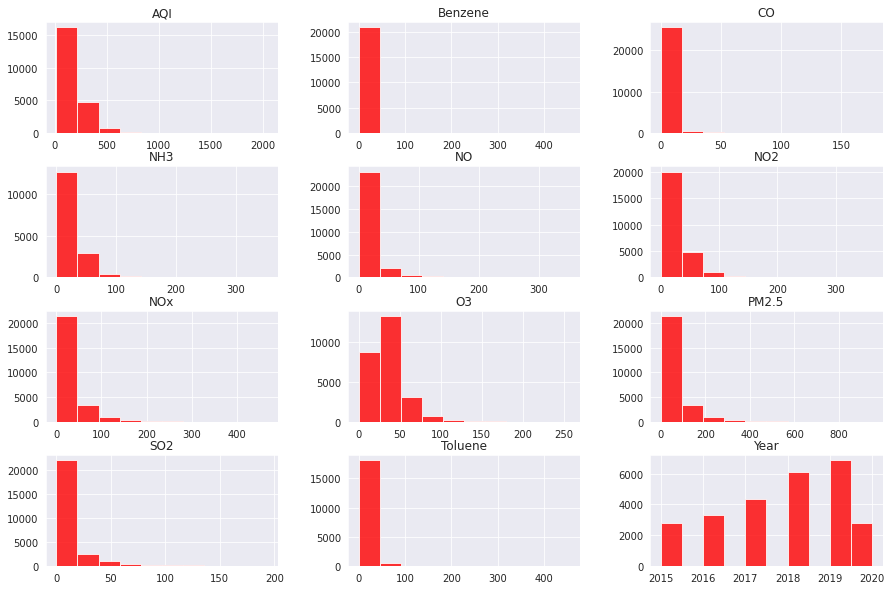

In [ ]:
df.hist(alpha=0.8, figsize=(15, 10), color = 'r')
plt.show()

# How AQI(air quality index) is distributed?

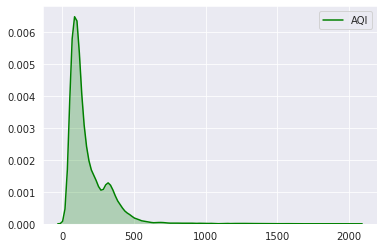

In [ ]:
sns.set_style("darkgrid")
sns.kdeplot(data=df['AQI'],label="AQI" ,shade=True, color = 'g')
plt.show()

# Undestanding the statistics and finding the interdependence of pollutants

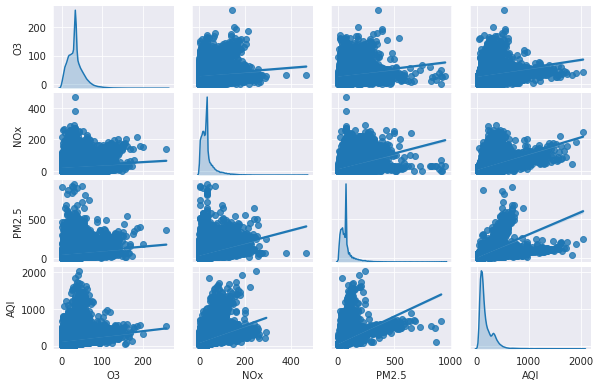

In [ ]:
a = sns.pairplot(df[['O3','NOx','PM2.5','AQI']] ,diag_kind="kde" , kind="reg")
a.fig.set_size_inches(8,5)
plt.show()

PM2.5 is directly proportional to AQI. Increase in PM2.5 leads to increase in AQI.

As O3 & AQI are also dependent.

As compared to O3 & PM2.5, NOx has somewhat less dependability.

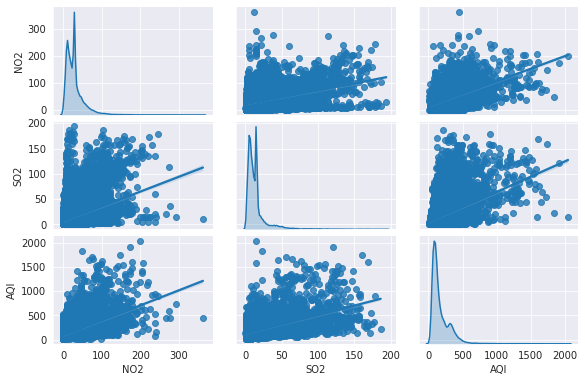

In [ ]:
g=sns.pairplot(df[['NO2','SO2','AQI']] ,diag_kind="kde" , kind="reg")
g.fig.set_size_inches(8,5)
plt.show()

SO2 & NO2 are directly related on AQI.

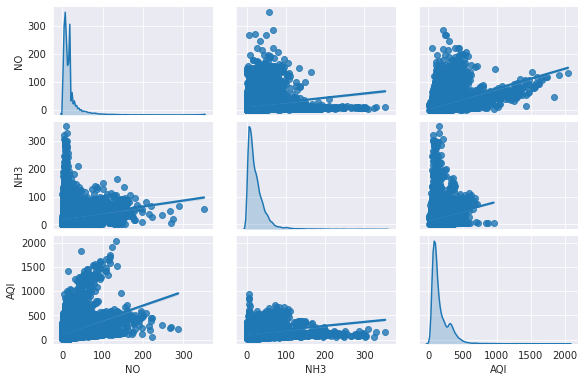

In [ ]:
b = sns.pairplot(df[['NO','NH3','AQI']] ,diag_kind="kde" , kind="reg" )
b.fig.set_size_inches(8,5)
plt.show()

NH3 does not have much impact on AQI.

# Visualizatitions w.r.t. all the major Compounds

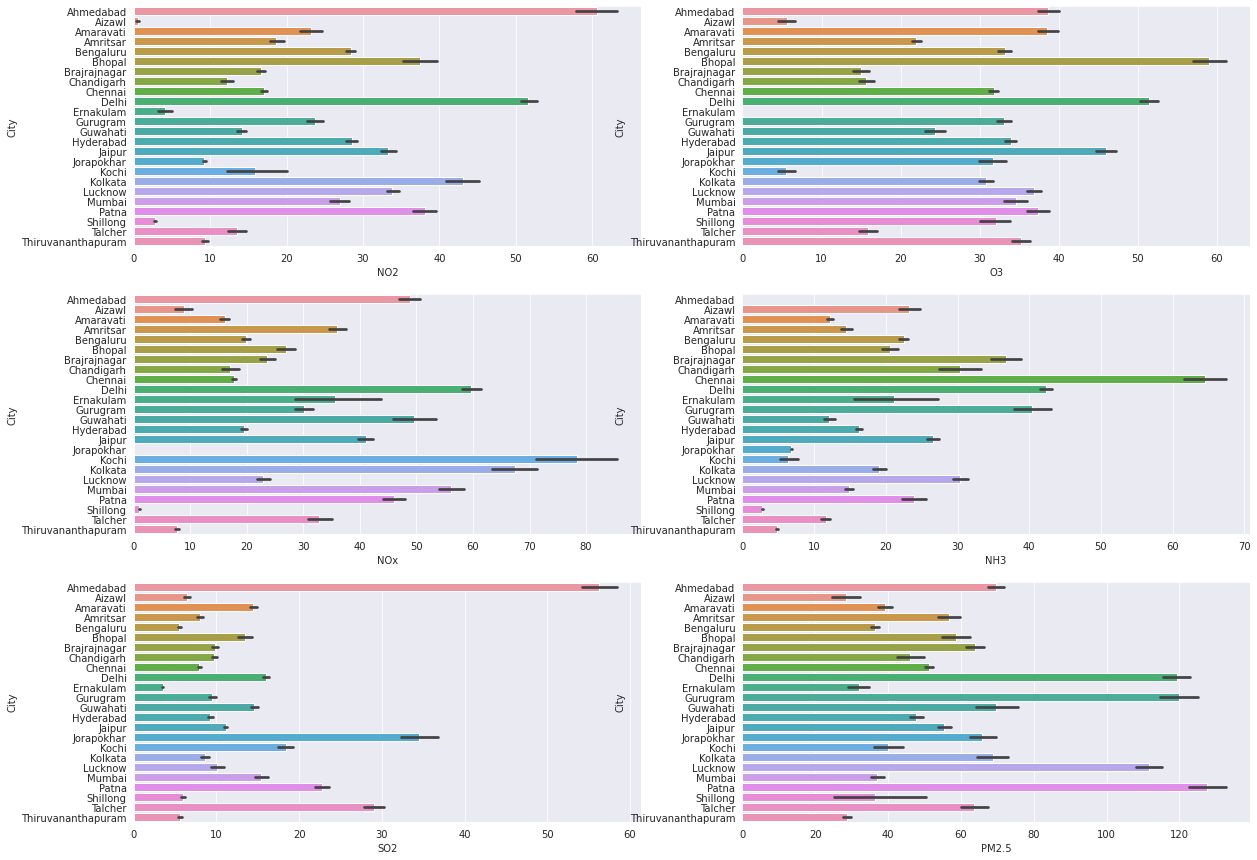

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=2,figsize=(20,15))
ax = sns.barplot("NO2", y="City",data=df,ax=axes[0,0])
ax = sns.barplot("O3", y="City",data=df,ax=axes[0,1])
ax = sns.barplot("NOx", y="City",data=df,ax=axes[1,0])
ax = sns.barplot("NH3", y="City",data=df,ax=axes[1,1])
ax = sns.barplot("SO2", y="City",data=df,ax=axes[2,0])
ax = sns.barplot("PM2.5", y="City",data=df,ax=axes[2,1])


Ahmedabad is worst affected by NO2 & SO2 levels.

O3 level is the highest at Bhopal followed by Delhi.

NOx level is the highest at Kochi followed by Kolkata.

NH3 level is highest in Chennai however, it's negligible at Ahmedabad.

PM2.5 level is highest in Delhi followed by Patna and Gurugram.



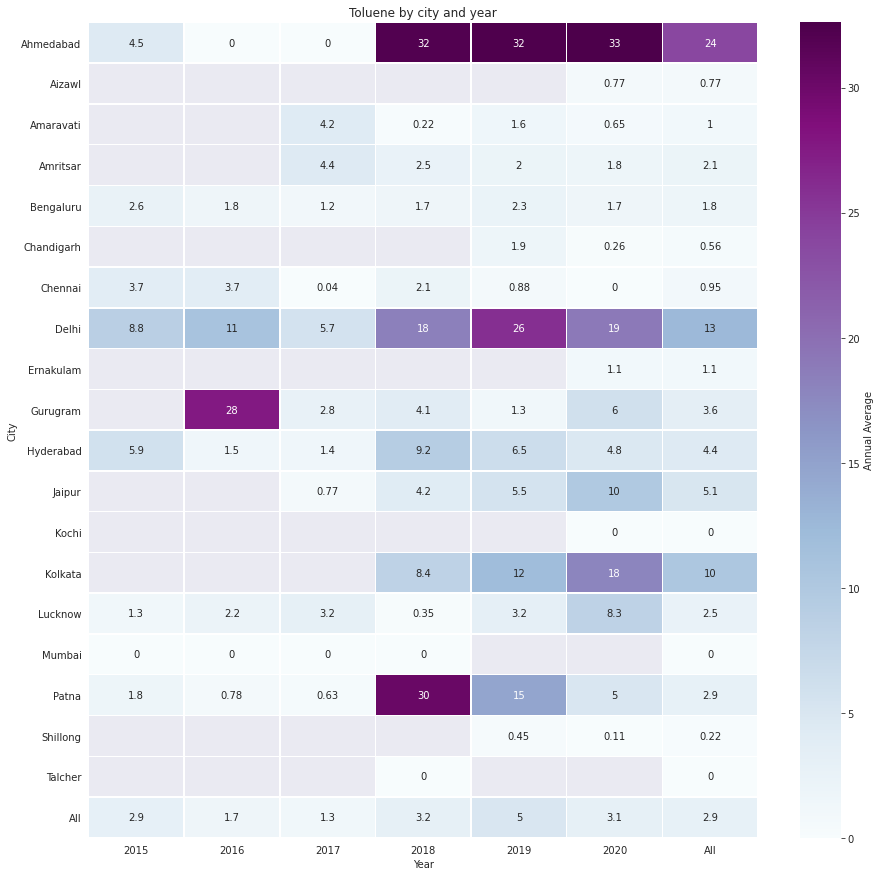

In [ ]:
#Heatmap Pivot with State as Row, Year as Col, Toluene as Value
f, ax = plt.subplots(figsize=(15,15))
ax.set_title('{} by city and year'.format('Toluene'))
sns.heatmap(df.pivot_table('Toluene', index='City',
                columns=['Year'],aggfunc='median',margins=True),
                annot=True,cmap="BuPu", linewidths=.5, ax=ax,cbar_kws={'label': 'Annual Average'})
plt.show()

It's max in Ahmedabad followed by Delhi.

Exposure to high levels of toluene could possibly damage your kidneys and liver.

# Average Pollution Levels

/usr/local/lib/python3.6/dist-packages/matplotlib/projections/polar.py:55: RuntimeWarning:

invalid value encountered in greater_equal



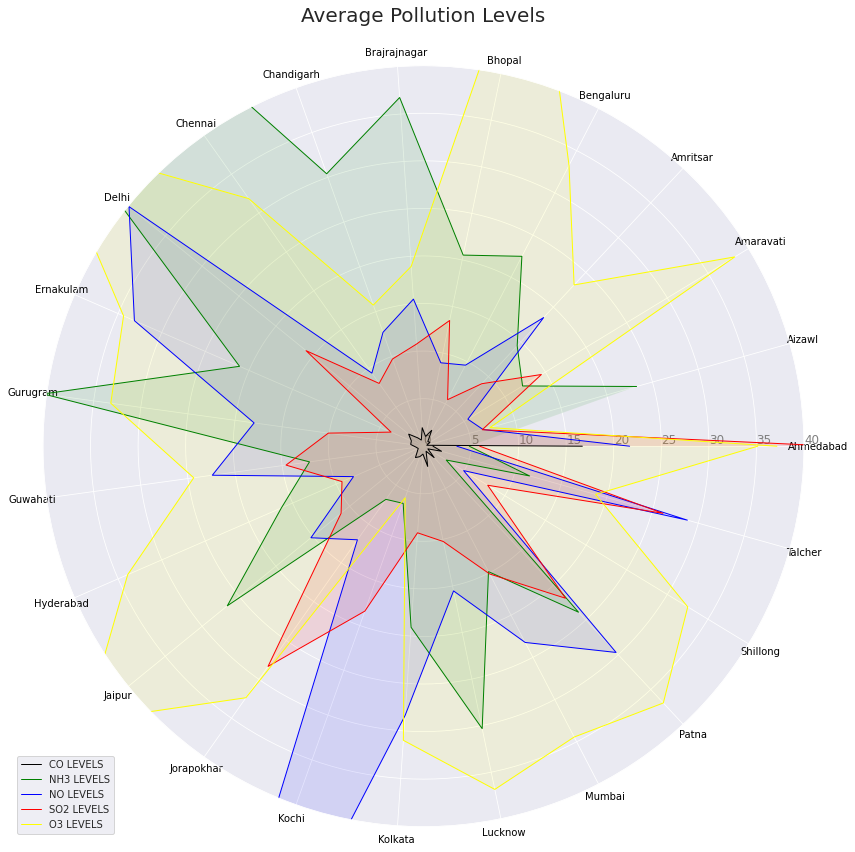

In [ ]:
import math
df_CO = df.pivot(index='Date', columns='City', values='CO')
df_CO = df_CO.fillna(df_CO.mean())

df_NH3 = df.pivot(index='Date', columns='City', values='NH3')
df_NH3 = df_NH3.fillna(df_NH3.mean())

df_NO = df.pivot(index='Date', columns='City', values='NO')
df_NO = df_NO.fillna(df_NO.mean())

df_SO2 = df.pivot(index='Date', columns='City', values='SO2')
df_SO2 = df_SO2.fillna(df_SO2.mean())

df_O3 = df.pivot(index='Date', columns='City', values='O3')
df_O3 = df_O3.fillna(df_O3.mean())

categories=list(df_CO)[0:]
N = len(categories)

values_co  = df_CO.mean(axis=0)
values_nh3  = df_NH3.mean(axis=0)
values_no  = df_NO.mean(axis=0)
values_so2 = df_SO2.mean(axis=0)
values_o3  = df_O3.mean(axis=0)

angles = [n / float(N-1) * 2 * math.pi for n in range(N-1)]
angles += angles[:1]

 
fig = plt.figure(figsize=(16,14))
ax = plt.subplot(111, polar=True)
 
plt.xticks(angles[:-1], categories, color='black', size=10)
 
ax.set_rlabel_position(0)
plt.yticks([0,5,10,15,20,25,30,35,40], ["0","5","10","15","20","25","30","35","40"], color="grey", size=12)
plt.ylim(0,40)
 
ax.plot(angles, values_co, 'k',linewidth=1, linestyle='solid', label="CO LEVELS")
ax.fill(angles, values_co, 'k', alpha=0.1)

ax.plot(angles, values_nh3, 'g',linewidth=1, linestyle='solid', label="NH3 LEVELS")
ax.fill(angles, values_nh3, 'g', alpha=0.1)

ax.plot(angles, values_no, 'blue',linewidth=1, linestyle='solid', label="NO LEVELS")
ax.fill(angles, values_no, 'blue', alpha=0.1)

ax.plot(angles, values_so2,'r',linewidth=1, linestyle='solid', label="SO2 LEVELS")
ax.fill(angles, values_so2,'r', alpha=0.1)

ax.plot(angles, values_o3, 'yellow',linewidth=1, linestyle='solid', label="O3 LEVELS")
ax.fill(angles, values_o3, 'yellow', alpha=0.1)

plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.title("Average Pollution Levels",fontsize=20);
plt.show()

O3 and NH3 levels are highly distributed throughout the country.

NO levels are high in Delhi and Kochi.

# Data by Year

In [ ]:
data_by_year = df.groupby(["City","Year"])['AQI'].mean().reset_index().dropna()
data_by_year = data_by_year.pivot_table(index = "City", columns = "Year", values = "AQI", aggfunc = np.mean).reset_index()
data_by_year

Year,City,2015,2016,2017,2018,2019,2020
0,Ahmedabad,310.950570,310.162393,558.768116,622.263305,516.352273,306.871795
1,Aizawl,NaN,NaN,NaN,NaN,NaN,49.098039
2,Amaravati,NaN,NaN,192.513514,101.391026,98.485437,63.032787
3,Amritsar,NaN,NaN,148.067669,122.925926,109.500000,95.176991
4,Bengaluru,112.573427,105.584046,87.120879,86.307479,91.602740,87.680328
5,Bhopal,NaN,NaN,NaN,NaN,162.609524,129.607143
6,Brajrajnagar,NaN,NaN,247.600000,154.996154,148.400621,139.158416
7,Chandigarh,NaN,NaN,NaN,NaN,135.547009,71.851240
8,Chennai,148.333333,138.565868,104.537396,105.490411,102.942466,74.819672
9,Delhi,297.024658,301.369863,256.727528,249.158904,232.104110,204.172131


For most of the cities, the data has not been provided for all the years.

# Top and Bottom 10 cities with highest and lowest AQI

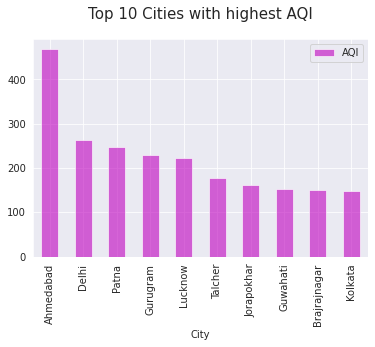

In [ ]:
df[['AQI','City']].groupby(["City"]).mean().sort_values(by='AQI',ascending=False).head(10).plot.bar(color='m' , alpha = 0.6)
plt.title("Top 10 Cities with highest AQI" , fontsize = 15, pad = 20 , loc = 'center')
plt.show()

Ahmedabad is the worst affected city followed by Delhi & Patna respectively.

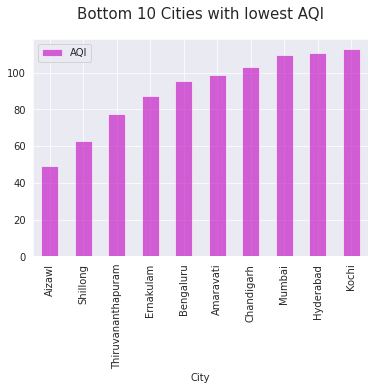

In [ ]:
df[['AQI','City']].groupby(["City"]).mean().sort_values(by='AQI',ascending=True).head(10).plot.bar(color='m' , alpha = 0.6)
plt.title("Bottom 10 Cities with lowest AQI" , fontsize = 15, pad = 20 , loc = 'center')
plt.show()

Since we can see that, the data has not been provided for all the years for most of the cities. 

In case of Aizawl the data available is of only 2020, so we cannot take that city into our comparison. Simillar is the case, for cities Ernakulam and Shillong.

So, we can say that **Thiruvananthapuram & Bengaluru** are the cities with good air quality.



# Effect of COVID-19 on Air Quality

We can clearly see that, the AQI for the year 2020, is much lesser than the previous years.

With the lockdown in effect for more than a month there is bound to be lesser pollution. But how much cleaner air are we breathing? Let's check out..





In [ ]:
df1 = df[((df.Date >= "2019-04-01") & (df.Date < "2019-04-10")) | ((df.Date >= "2020-04-01") & (df.Date < "2020-04-10"))]

df1 = df1.groupby(["City", "Year"])["AQI"].mean().reset_index()
df1 = df1.pivot_table(index = "City", columns = "Year", values = "AQI", aggfunc = np.mean).reset_index()
df1.rename(columns = {2019: "AQI_2019_April", 2020: "AQI_2020_April"}, inplace = True)
df1["Improvement in AQI (in %)"] = round((df1.AQI_2019_April - df1.AQI_2020_April) * 100 / df1.AQI_2019_April, 2)

df1.sort_values("Improvement in AQI (in %)", ascending = False, ignore_index = True, inplace = True)
df1.columns.name = None

In [ ]:
cm = sns.light_palette("purple", as_cmap = True)
df1.head(12).style.background_gradient(cmap = cm)

,City,AQI_2019_April,AQI_2020_April,Improvement in AQI (in %)
0,Ahmedabad,580.000000,164.333333,71.670000
1,Delhi,245.222222,94.333333,61.530000
2,Lucknow,224.222222,90.000000,59.860000
3,Gurugram,229.111111,94.000000,58.970000
4,Jaipur,171.111111,77.111111,54.940000
5,Amritsar,126.333333,61.400000,51.400000
6,Bengaluru,131.666667,69.555556,47.170000
7,Amaravati,85.444444,50.222222,41.220000
8,Brajrajnagar,252.600000,149.666667,40.750000
9,Chennai,108.000000,64.000000,40.740000


Those are some incredible numbers that India has not seen for a long long time.

* Ahmedabad has over 70% better air than last April while Delhi, Lucknow and Gurugram have ~ 60% better air than last April.

* Most cities have shown a significant improvement in AQI from last April.

![picture](https://drive.google.com/uc?id=1bMui4Q2FXzUehILF3F9R85QGTHRHO7rv)


# Visualise yearwise AQI for some of the cities

In [ ]:
# group the city columns and take the mean AQI values
data1 = df['AQI'].dropna()
top_6_city = df.loc[data1.index].groupby('City')['AQI'].mean().reset_index()
top_6_city.sort_values('AQI', ascending=False, inplace=True)

# array of top 10 cities with highest AQI
top_cities = top_6_city.head(6)['City'].tolist()

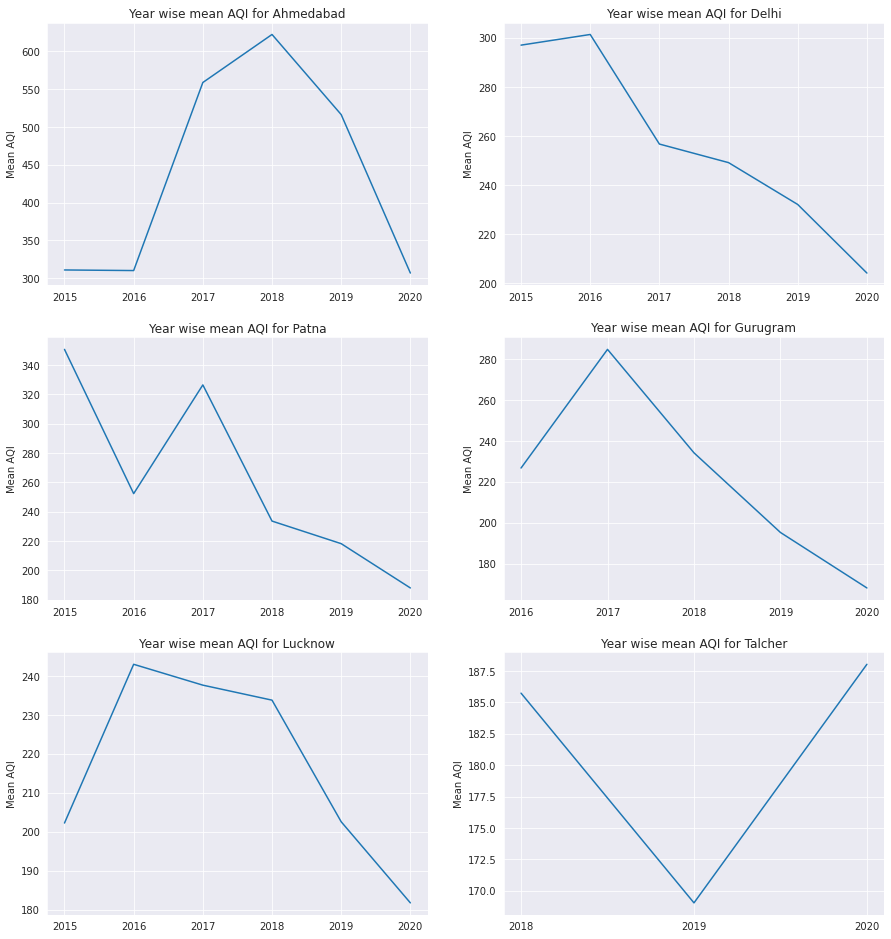

In [ ]:
# Line plot of yearwise AQI of all cities
fig = plt.figure(figsize=(15,28))

for city,num in zip(top_cities, range(1,11)):
    data = df[df['City']==city]
    data_by_year = data.groupby('Year')['AQI'].mean().reset_index().dropna()
    ax = fig.add_subplot(5,2,num)
    ax.plot(data_by_year['Year'], data_by_year['AQI'])
    ax.set_xticks(data_by_year['Year'].tolist())
    ax.set_title('Year wise mean AQI for {}'.format(city))
    ax.set_ylabel('Mean AQI')

Observations from the above plot:

* The Air quality of Ahmedabad had started deteriorating from the year 2016 and was worst in 2018. Since then, the air quality has improved and in 2020, it is at it's best because of the lockdown.

* The air quality of the capital was very poor. But from 2016, certain measures were taken by the state government and since then the quality had improved a lot.

* Most of the cities have the clearer air to breathe in the year 2020, but in **Talcher** the AQI level has increased.

**Talcher** also named as **City of Black Diamond** or **Coal City of Odisha** is one of the fastest growing industrial and coal hubs in the state.

Talcher is known for its coal reserves and that determine it's increasing pollutant levels in the city.
